In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Live_K-Means.csv')

In [7]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [11]:
df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [17]:
unique_status_ids_count=df['status_id'].nunique

In [23]:
df['status_published'].nunique()

6913

In [25]:
df['status_type'].nunique()

4

In [29]:
df.drop(columns=['status_id', 'status_published'], inplace=True)

In [31]:
x=df.drop('status_type',axis=1)

In [33]:
y=df['status_type']

In [35]:
print("feature vector(x):")
print(x.head(2))

feature vector(x):
   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   

   num_hahas  num_sads  num_angrys  
0          1         1           0  
1          0         0           0  


In [37]:
print("\nTarget variable(y):")
print(y.head(2))


Target variable(y):
0    video
1    photo
Name: status_type, dtype: object


In [39]:
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

In [41]:
summary =x.describe()
print(summary)

       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652   
std       462.625309    889.636820   131.599965   449.472357    39.972930   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  
count  7050.000000  7050.000000  7050.000000  7050.000000  
mean      1.289362     0.696454     0.243688     0.113191  
std       8.719650     3.957183     1.597156     0.726812  
min       0.000000     0.000000     0.000000     0.000000  
25%   

In [43]:
#feature scaling
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [45]:
#k-means model with two cluster
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=2, random_state=42)

In [47]:
kmeans.cluster_centers_

array([[0.02483047, 0.00932759, 0.00889636, 0.02254048, 0.01423501,
        0.00215728, 0.00331136, 0.00441161, 0.00279261],
       [0.35566655, 0.02806954, 0.04734731, 0.34084022, 0.08499512,
        0.03631548, 0.01879727, 0.00945925, 0.01461694]])

In [49]:
kmeans.inertia_

99.50082638379935

In [51]:
silhoutte_avg=silhouette_score(x_scaled,kmeans.labels_)
print(f"silhouette score for 2 cluster: {silhoutte_avg}")

silhouette score for 2 cluster: 0.8125263296260138


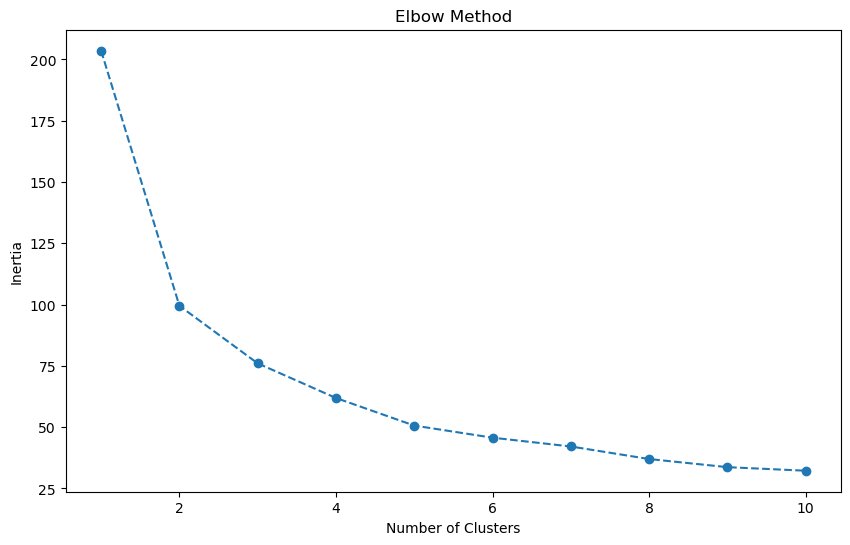

In [53]:
intertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(x_scaled)
  intertia.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.plot(range(1,11),intertia,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [55]:
kmeans2=KMeans(n_clusters=2,random_state=42)
kmeans2.fit(x_scaled)
labels=kmeans2.labels_
#checked how many of the samples were correctly labeled
correct_labels=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." %(correct_labels,y.size))
print('Accuracy score: {:.2f}'.format(correct_labels / float(y.size)))

Result: 275 out of 7050 samples were correctly labeled.
Accuracy score: 0.04
